<a href="https://colab.research.google.com/github/mateusopaiva/lebron-james/blob/main/LeBron_James.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise LeBron James

## Bibliotecas

In [105]:
pip install nba_api

In [106]:
import pandas as pd
pd.set_option('display.max_columns', None)

## ETL

In [107]:
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.static import players

# Defina o nome do jogador
player_name = "LeBron James"

# Encontrar o ID do jogador usando o nome
players = players.get_players()
player = next(player for player in players if player['full_name'] == player_name)
player_id = player['id']

# Obter as estatísticas de carreira do jogador
lebron_career = playercareerstats.PlayerCareerStats(player_id=player_id)

# Acessar os dados em formato DataFrame
df_lebron_career = lebron_career.get_data_frames()[0]

# limpeza dos dados
df_lebron_career  = df_lebron_career.drop(columns=['PLAYER_ID'])
df_lebron_career  = df_lebron_career.drop(columns=['LEAGUE_ID'])
df_lebron_career  = df_lebron_career.drop(columns=['TEAM_ID'])
df_lebron_career['PLAYER_AGE'] = df_lebron_career['PLAYER_AGE'].astype(int)

# Removendo o primeiro caractere '2' da coluna SEASON
df_lebron_career.rename(columns={'SEASON_ID': 'SEASON'}, inplace=True)
df_lebron_career['SEASON'] = df_lebron_career['SEASON'].astype(str).str[2:]

# csv
df_lebron_career.to_csv("lebron_career.csv", index=False)

In [108]:
df_lebron_career

,SEASON,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,03-04,CLE,19,79,79,3120.0,622,1492,0.417,63,217,0.290,347,460,0.754,99,333,432,465,130,58,273,149,1654
1,04-05,CLE,20,80,80,3388.0,795,1684,0.472,108,308,0.351,477,636,0.750,111,477,588,577,177,52,262,146,2175
2,05-06,CLE,21,79,79,3361.0,875,1823,0.480,127,379,0.335,601,814,0.738,75,481,556,521,123,66,260,181,2478
3,06-07,CLE,22,78,78,3190.0,772,1621,0.476,99,310,0.319,489,701,0.698,83,443,526,470,125,55,250,171,2132
4,07-08,CLE,23,75,74,3027.0,794,1642,0.484,113,359,0.315,549,771,0.712,133,459,592,539,138,81,255,165,2250
5,08-09,CLE,24,81,81,3054.0,789,1613,0.489,132,384,0.344,594,762,0.780,106,507,613,587,137,93,241,139,2304
6,09-10,CLE,25,76,76,2966.0,768,1528,0.503,129,387,0.333,593,773,0.767,71,483,554,651,125,77,261,119,2258
7,10-11,MIA,26,79,79,3063.0,758,1485,0.510,92,279,0.330,503,663,0.759,80,510,590,554,124,50,284,163,2111
8,11-12,MIA,27,62,62,2326.0,621,1169,0.531,54,149,0.362,387,502,0.771,94,398,492,387,115,50,213,96,1683
9,12-13,MIA,28,76,76,2877.0,765,1354,0.565,103,254,0.406,403,535,0.753,97,513,610,551,129,67,226,110,2036


## Media por Jogo

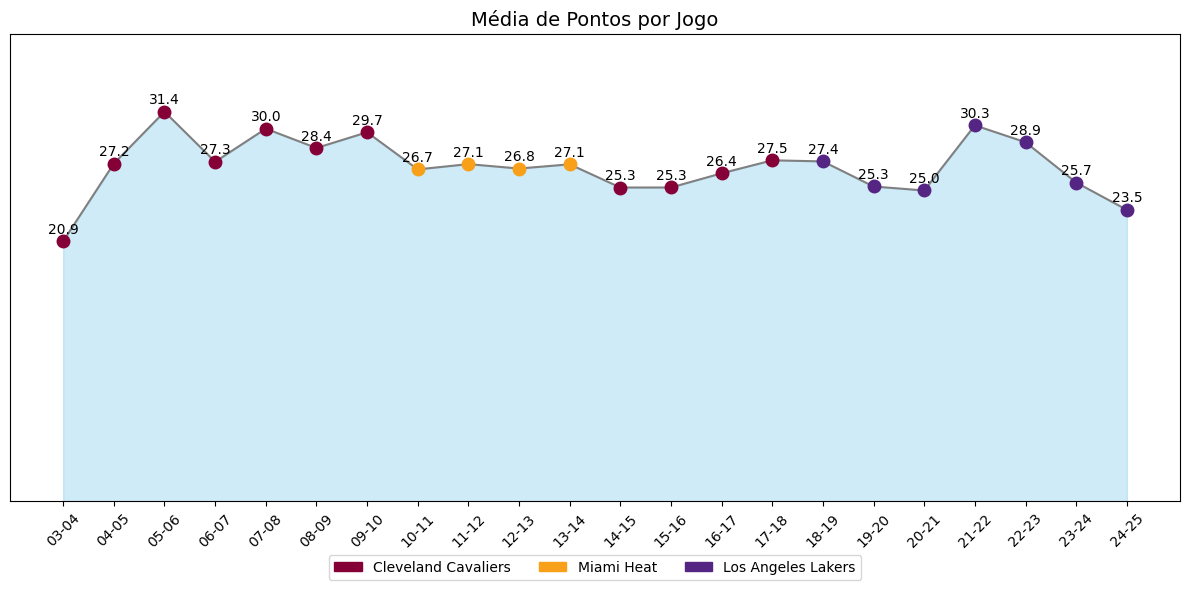

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Calcular a média de rebotes por jogo
df_lebron_career['PTS_per_game'] = df_lebron_career['PTS'] / df_lebron_career['GP']

# Definir as cores para cada time
team_colors = {
    'CLE': '#860038',  # Cleveland Cavaliers
    'MIA': '#F9A01B',  # Miami Heat
    'LAL': '#552583'   # Los Angeles Lakers
}

# Plotando o gráfico de linha para Rebotes por Jogo
plt.figure(figsize=(12, 6))

# Adicionando a linha e preenchimento
plt.plot(df_lebron_career['SEASON'], df_lebron_career['PTS_per_game'], color='gray', linestyle='-', linewidth=1.5)
plt.fill_between(df_lebron_career['SEASON'], df_lebron_career['PTS_per_game'], color='skyblue', alpha=0.4)

# Adicionando os pontos coloridos
for i, row in df_lebron_career.iterrows():
    plt.plot(row['SEASON'], row['PTS_per_game'], marker='o',
             color=team_colors[row['TEAM_ABBREVIATION']], markersize=9)

# Adicionando valores ao lado dos pontos
for i, row in df_lebron_career.iterrows():
    plt.text(row['SEASON'], row['PTS_per_game'] + 0.4, f'{row["PTS_per_game"]:.1f}',
             ha='center', va='bottom', fontsize=10)

# Adicionando título
plt.title('Média de Pontos por Jogo', fontsize=14)

# Ajustar limite superior para mais espaço
plt.ylim(0, df_lebron_career['PTS_per_game'].max() * 1.2)

# Adicionando legenda fora do gráfico
handles = [mpatches.Patch(color='#860038', label='Cleveland Cavaliers'),
           mpatches.Patch(color='#F9A01B', label='Miami Heat'),
           mpatches.Patch(color='#552583', label='Los Angeles Lakers')]
plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Ajustando rótulos do eixo X
plt.xticks(rotation=45)

# Remover valores do eixo Y
plt.yticks([])

# Remover linhas de grid
plt.grid(False)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

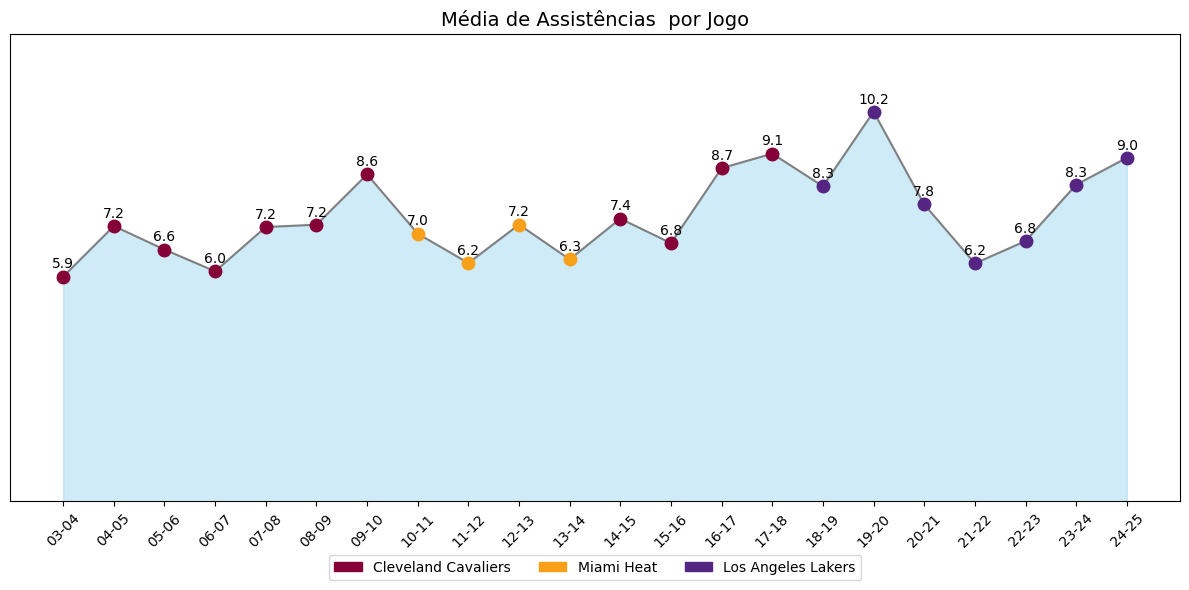

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Calcular a média de rebotes por jogo
df_lebron_career['AST_per_game'] = df_lebron_career['AST'] / df_lebron_career['GP']

# Definir as cores para cada time
team_colors = {
    'CLE': '#860038',  # Cleveland Cavaliers
    'MIA': '#F9A01B',  # Miami Heat
    'LAL': '#552583'   # Los Angeles Lakers
}

# Plotando o gráfico de linha para Rebotes por Jogo
plt.figure(figsize=(12, 6))

# Adicionando a linha e preenchimento
plt.plot(df_lebron_career['SEASON'], df_lebron_career['AST_per_game'], color='gray', linestyle='-', linewidth=1.5)
plt.fill_between(df_lebron_career['SEASON'], df_lebron_career['AST_per_game'], color='skyblue', alpha=0.4)

# Adicionando os pontos coloridos
for i, row in df_lebron_career.iterrows():
    plt.plot(row['SEASON'], row['AST_per_game'], marker='o',
             color=team_colors[row['TEAM_ABBREVIATION']], markersize=9)

# Adicionando valores ao lado dos pontos
for i, row in df_lebron_career.iterrows():
    plt.text(row['SEASON'], row['AST_per_game'] + 0.15, f'{row["AST_per_game"]:.1f}',
             ha='center', va='bottom', fontsize=10)

# Adicionando título
plt.title('Média de Assistências por Jogo', fontsize=14)

# Ajustar limite superior para mais espaço
plt.ylim(0, df_lebron_career['AST_per_game'].max() * 1.2)

# Adicionando legenda fora do gráfico
handles = [mpatches.Patch(color='#860038', label='Cleveland Cavaliers'),
           mpatches.Patch(color='#F9A01B', label='Miami Heat'),
           mpatches.Patch(color='#552583', label='Los Angeles Lakers')]
plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Ajustando rótulos do eixo X
plt.xticks(rotation=45)

# Remover valores do eixo Y
plt.yticks([])

# Remover linhas de grid
plt.grid(False)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

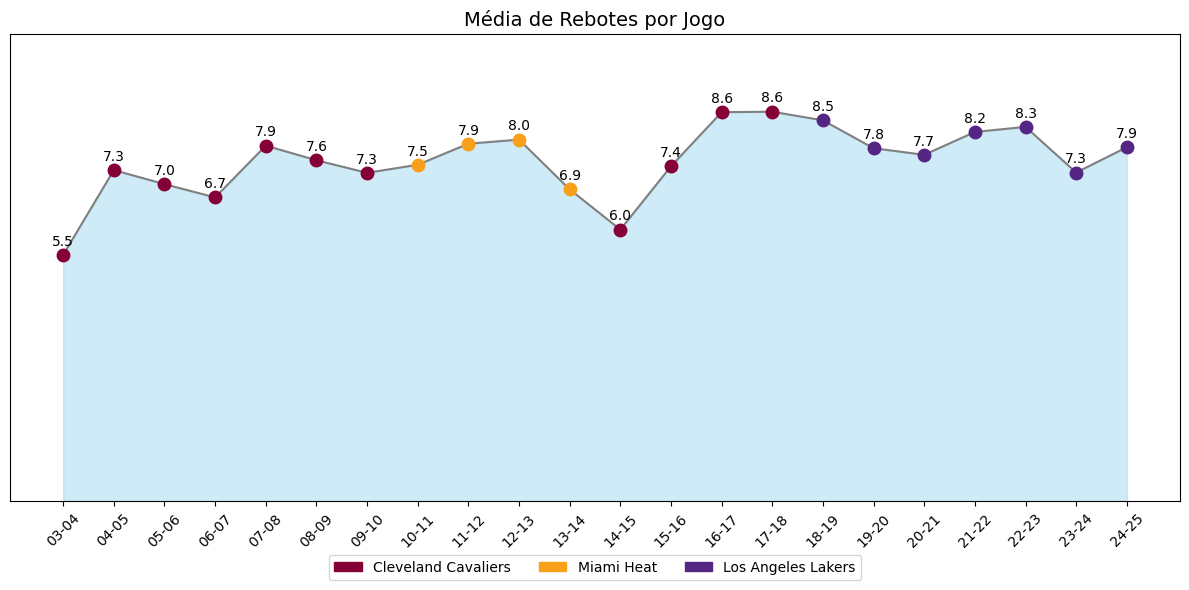

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Calcular a média de rebotes por jogo
df_lebron_career['REB_per_game'] = df_lebron_career['REB'] / df_lebron_career['GP']

# Definir as cores para cada time
team_colors = {
    'CLE': '#860038',  # Cleveland Cavaliers
    'MIA': '#F9A01B',  # Miami Heat
    'LAL': '#552583'   # Los Angeles Lakers
}

# Plotando o gráfico de linha para Rebotes por Jogo
plt.figure(figsize=(12, 6))

# Adicionando a linha e preenchimento
plt.plot(df_lebron_career['SEASON'], df_lebron_career['REB_per_game'], color='gray', linestyle='-', linewidth=1.5)
plt.fill_between(df_lebron_career['SEASON'], df_lebron_career['REB_per_game'], color='skyblue', alpha=0.4)

# Adicionando os pontos coloridos
for i, row in df_lebron_career.iterrows():
    plt.plot(row['SEASON'], row['REB_per_game'], marker='o',
             color=team_colors[row['TEAM_ABBREVIATION']], markersize=9)

# Adicionando valores ao lado dos pontos
for i, row in df_lebron_career.iterrows():
    plt.text(row['SEASON'], row['REB_per_game'] + 0.15, f'{row["REB_per_game"]:.1f}',
             ha='center', va='bottom', fontsize=10)

# Adicionando título
plt.title('Média de Rebotes por Jogo', fontsize=14)

# Ajustar limite superior para mais espaço
plt.ylim(0, df_lebron_career['REB_per_game'].max() * 1.2)

# Adicionando legenda fora do gráfico
handles = [mpatches.Patch(color='#860038', label='Cleveland Cavaliers'),
           mpatches.Patch(color='#F9A01B', label='Miami Heat'),
           mpatches.Patch(color='#552583', label='Los Angeles Lakers')]
plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=3)

# Ajustando rótulos do eixo X
plt.xticks(rotation=45)

# Remover valores do eixo Y
plt.yticks([])

# Remover linhas de grid
plt.grid(False)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

## PTS, AST, REB por Temporada

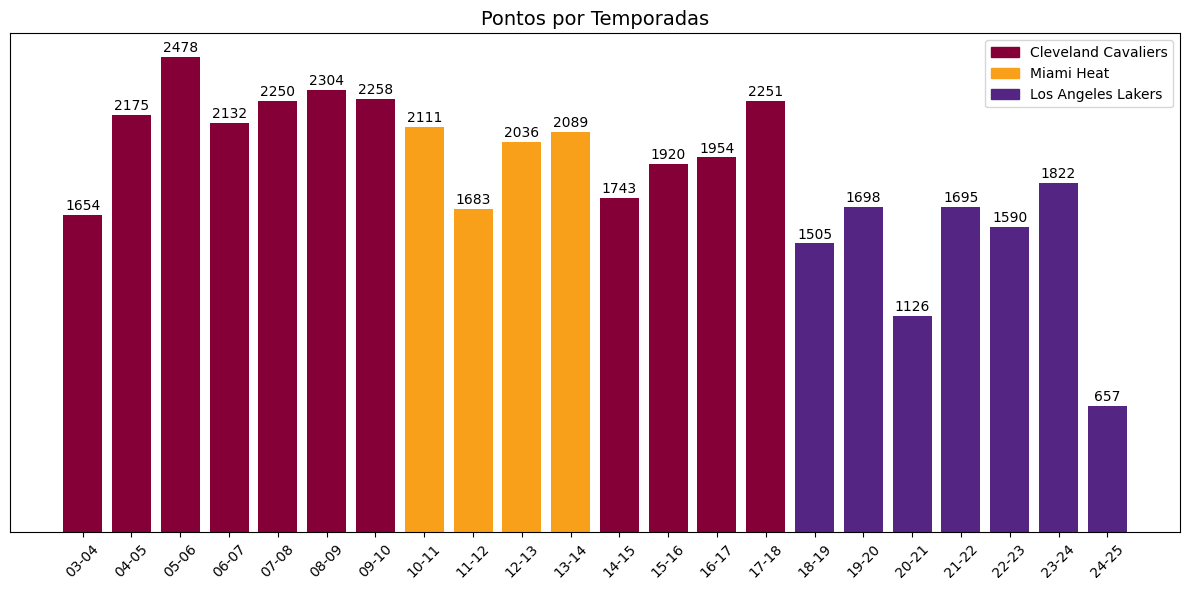

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Definir as cores para cada time
team_colors = {
    'CLE': '#860038',  # Cleveland Cavaliers
    'MIA': '#F9A01B',    # Miami Heat
    'LAL': '#552583'  # Los Angeles Lakers
}

# Plotando o gráfico de barras para Pontos por Jogo
plt.figure(figsize=(12, 6))
bars = plt.bar(df_lebron_career['SEASON'], df_lebron_career['PTS'], color=[team_colors[team] for team in df_lebron_career['TEAM_ABBREVIATION']])

# Adicionando título e rótulos
plt.title('Pontos por Temporadas', fontsize=14)

# Adicionando legenda para as cores
handles = [mpatches.Patch(color='#860038', label='Cleveland Cavaliers'),
           mpatches.Patch(color='#F9A01B', label='Miami Heat'),
           mpatches.Patch(color='#552583', label='Los Angeles Lakers')]

plt.legend(handles=handles)

# Ajustando os rótulos do eixo X
plt.xticks(rotation=45)

# Remover os valores de referência do eixo Y
plt.yticks([])  # Remove os números do eixo Y

# Remover as linhas de grid
plt.grid(False)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

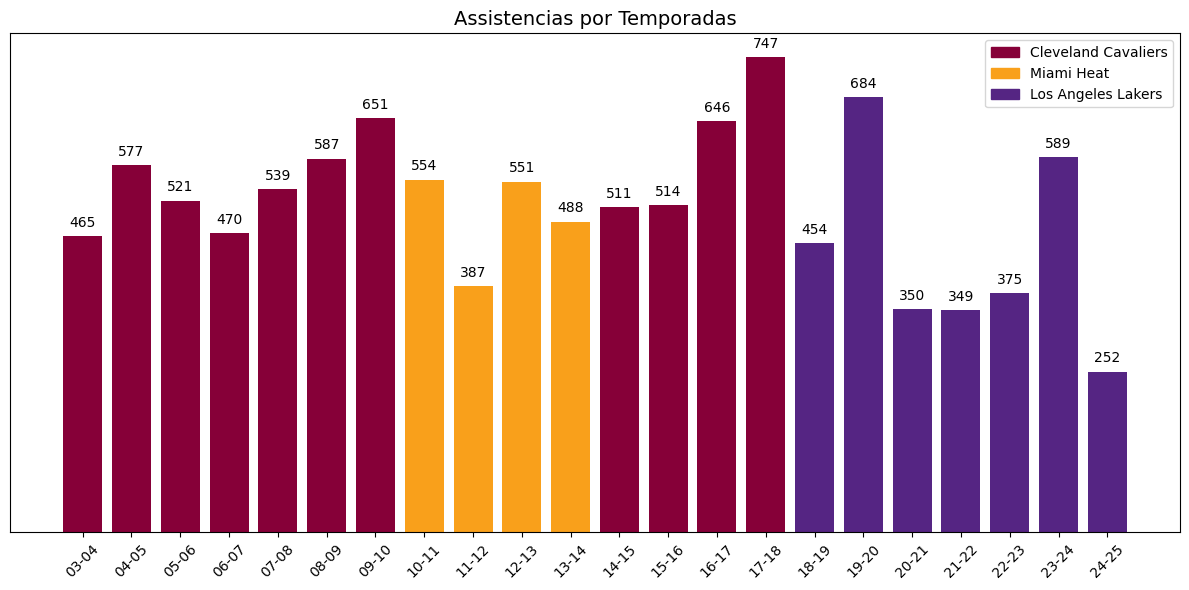

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Definir as cores para cada time
team_colors = {
    'CLE': '#860038',  # Cleveland Cavaliers
    'MIA': '#F9A01B',    # Miami Heat
    'LAL': '#552583'  # Los Angeles Lakers
}

# Plotando o gráfico de barras para Pontos por Jogo
plt.figure(figsize=(12, 6))
bars = plt.bar(df_lebron_career['SEASON'], df_lebron_career['AST'], color=[team_colors[team] for team in df_lebron_career['TEAM_ABBREVIATION']])

# Adicionando título e rótulos
plt.title('Assistencias por Temporadas', fontsize=14)

# Adicionando legenda para as cores
handles = [mpatches.Patch(color='#860038', label='Cleveland Cavaliers'),
           mpatches.Patch(color='#F9A01B', label='Miami Heat'),
           mpatches.Patch(color='#552583', label='Los Angeles Lakers')]

plt.legend(handles=handles)

# Ajustando os rótulos do eixo X
plt.xticks(rotation=45)

# Remover os valores de referência do eixo Y
plt.yticks([])  # Remove os números do eixo Y

# Remover as linhas de grid
plt.grid(False)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

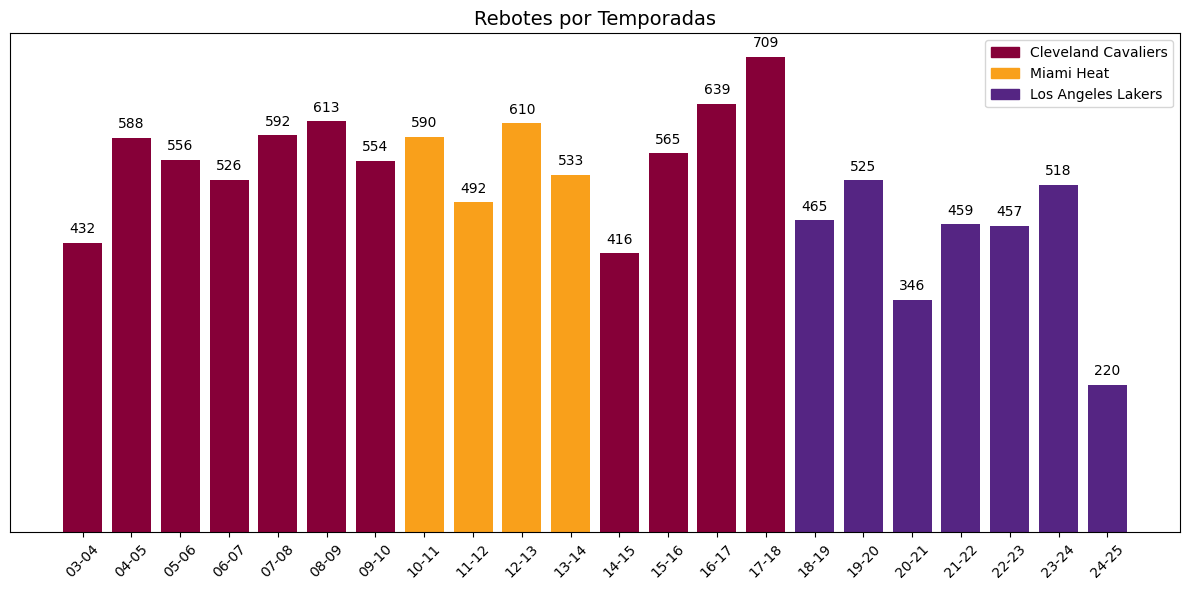

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Definir as cores para cada time
team_colors = {
    'CLE': '#860038',  # Cleveland Cavaliers
    'MIA': '#F9A01B',    # Miami Heat
    'LAL': '#552583'  # Los Angeles Lakers
}

# Plotando o gráfico de barras para Pontos por Jogo
plt.figure(figsize=(12, 6))
bars = plt.bar(df_lebron_career['SEASON'], df_lebron_career['REB'], color=[team_colors[team] for team in df_lebron_career['TEAM_ABBREVIATION']])

# Adicionando título e rótulos
plt.title('Rebotes por Temporadas', fontsize=14)

# Adicionando legenda para as cores
handles = [mpatches.Patch(color='#860038', label='Cleveland Cavaliers'),
           mpatches.Patch(color='#F9A01B', label='Miami Heat'),
           mpatches.Patch(color='#552583', label='Los Angeles Lakers')]

plt.legend(handles=handles)

# Ajustando os rótulos do eixo X
plt.xticks(rotation=45)

# Remover os valores de referência do eixo Y
plt.yticks([])  # Remove os números do eixo Y

# Remover as linhas de grid
plt.grid(False)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

## Tentativas e acertos FGM, FG3M e FTM

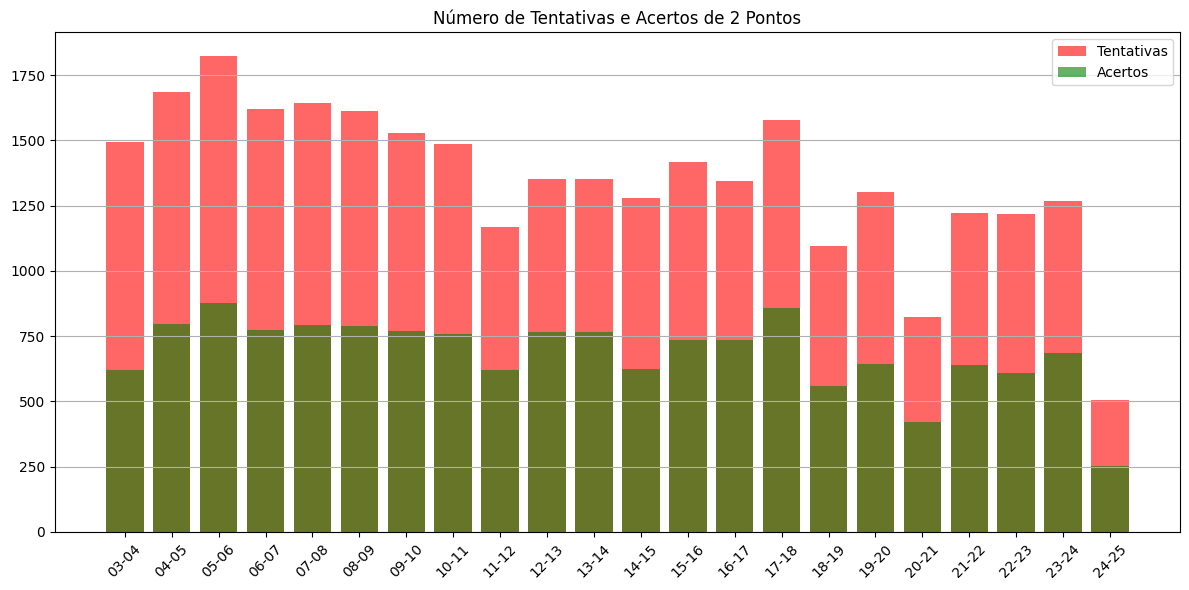

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotar o gráfico
plt.figure(figsize=(12, 6))

# Gráfico de tentativas
plt.bar(df_lebron_career['SEASON'], df_lebron_career['FGA'], label='Tentativas', color='r', alpha=0.6)

# Gráfico de acertos
plt.bar(df_lebron_career['SEASON'], df_lebron_career['FGM'], label='Acertos', color='g', alpha=0.6)

# Adicionar título e rótulos
plt.title('Número de Tentativas e Acertos de 2 Pontos')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')

# Mostrar o gráfico
plt.tight_layout()
plt.savefig('grafico1.png')
plt.show()

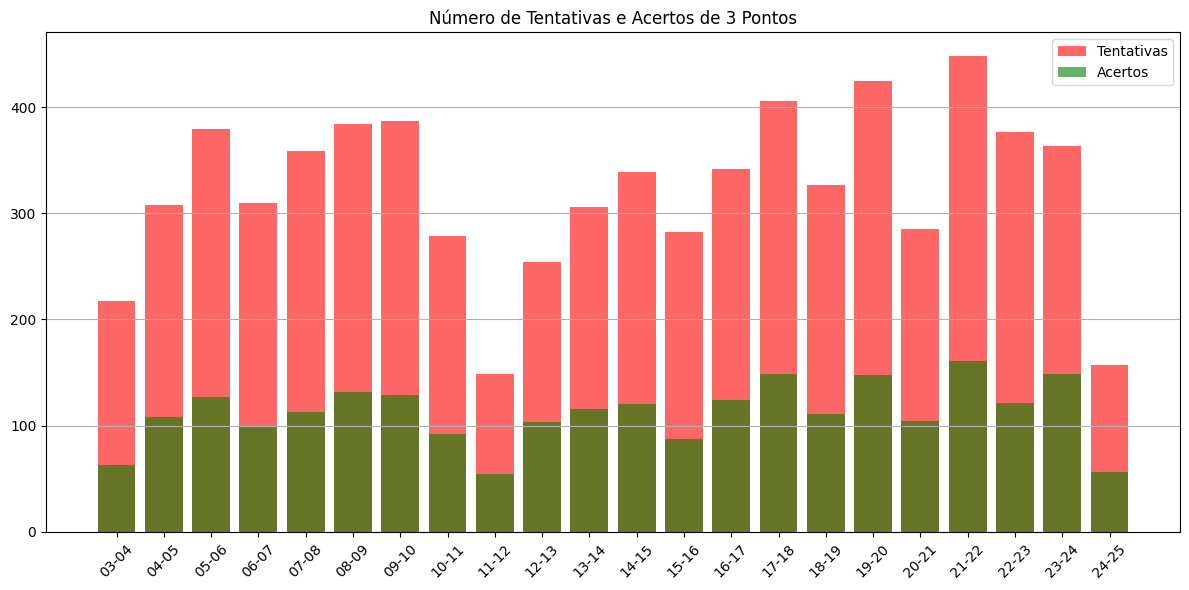

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotar o gráfico
plt.figure(figsize=(12, 6))

# Gráfico de tentativas
plt.bar(df_lebron_career['SEASON'], df_lebron_career['FG3A'], label='Tentativas', color='r', alpha=0.6)

# Gráfico de acertos
plt.bar(df_lebron_career['SEASON'], df_lebron_career['FG3M'], label='Acertos', color='g', alpha=0.6)

# Adicionar título e rótulos
plt.title('Número de Tentativas e Acertos de 3 Pontos')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')

# Mostrar o gráfico
plt.tight_layout()
plt.savefig('grafico1.png')
plt.show()

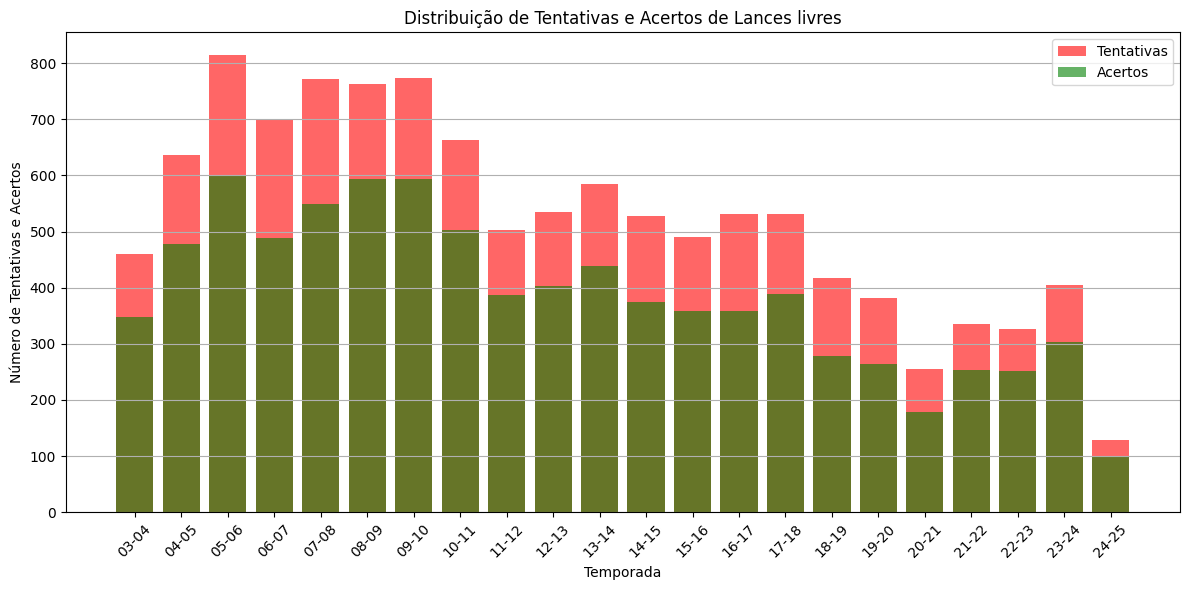

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotar o gráfico
plt.figure(figsize=(12, 6))

# Gráfico de tentativas
plt.bar(df_lebron_career['SEASON'], df_lebron_career['FTA'], label='Tentativas', color='r', alpha=0.6)

# Gráfico de acertos
plt.bar(df_lebron_career['SEASON'], df_lebron_career['FTM'], label='Acertos', color='g', alpha=0.6)

# Adicionar título e rótulos
plt.title('Distribuição de Tentativas e Acertos de Lances livres')
plt.xlabel('Temporada')
plt.ylabel('Número de Tentativas e Acertos')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y')

# Mostrar o gráfico
plt.tight_layout()
plt.savefig('grafico1.png')
plt.show()